In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
figheight=8

# Brownian Motion illustrated


Somes videos found on the www:

BM under the Microcope  

https://www.youtube.com/watch?v=Xscn-QSmFo4

https://www.youtube.com/watch?v=J_uOVllsCVg

Pollen size:

http://www-saps.plantsci.cam.ac.uk/pollen/index2.htm

Noise colors:

https://en.wikipedia.org/wiki/White_noise


### Sources :

Pais, "Subtle is the Lord: The Science and the Life of Albert Einstein", https://scholar.google.com/scholar?hl=fr&as_sdt=0%2C5&q=subtle+is+the+lord&btnG=

Jean Perrin, "Brownian Motion and Molecular Reality", 1909


## Three characters involved in BM


In [2]:
display(HTML("<table><tr>\
            <td><img src='./DATA_BM/Brown_Pic.png'></td>\
            <td><img src='./DATA_BM/Einstein_Pic.png'></td>\
            <td><img src='./DATA_BM/Perrin_Pic2.png' style='width: 50%; height: 50%'></td>\
            </tr></table>"))

,,


## 1) Experimental observation of BM
Quoting Jean Perrin : 

"The figure here reproduced shows three drawings obtained by tracing the segments which join the  consecutive positions of the same granules of mastic at intervals of 30 seconds.  [...] 

They only give a very feeble idea of the  prodigiously entangled character of the real trajectory.  If the positions were indicated from second to second, each of these rectilinear segments would be replaced by a polygonal contour of 30 sides, relatively as complicated as the drawing here reproduced, and so on. "

''One realises from such examples how near the mathematicians are to the truth in refusing, by a logical instinct, to admit the pretended geometrical demonstrations, which are regarded as experimental evidence for the existence of a tangent at each point of a curve."

In [3]:
display(HTML("<table><tr>\
            <td><img src='./DATA_BM/Perrin_Traj.png'></td>\
            </tr></table>"))

""


## 2) Numerics

In [4]:
class Gaussian_Choleski:
        def __init__(self,NT=200,M=5000,c=lambda t : lambda s: 0.5*(s+t-np.abs(s-t)),kappa=1,figheight=figheight):
            self.NT=NT #parameters
            self.M=M #Number of points
            self.kappa=1
            
            self.figheight=figheight
            t=np.arange(1,NT)/NT
            tt=np.meshgrid(t,t)

            self.Time=np.zeros(NT)
            self.Time[1:]=t
            self.gamma=c(tt[0])(tt[1]) ## CORRELATION MATRIX
            
            self.L=np.linalg.cholesky(self.gamma)
            self.Z=np.zeros((NT,M))
            for i in range(self.M):
                Delta=np.random.randn(NT-1,1)*sqrt(kappa)
                X=self.L@Delta
                self.Z[1:,i]=X[:].flatten()

        def show(self,norm=True,figheight=None,every=100):
            if figheight is None:figheight=self.figheight
            Time=self.Time
            Z=self.Z
            kappa=self.kappa
            
            fig,ax=subplots(1,3,figsize=(3*figheight,figheight))

            #SAMPLES
            for i in range(0,self.M,every):
                ax[0].plot(self.Time,self.Z[:,i])
                ax[0].set_xlim(0,1)
                ax[0].set_xlabel('time')
                ax[0].set_ylabel('$W_t$')
                ax[0].grid('on')

            ##AVERAGES
            ia=1
            ax[ia].plot(Time,Z.mean(axis=1),label='$<W_t>$')
            ax[ia].plot(Time,np.sqrt((Z**2).mean(axis=1)),label='$<W_t^2>^{1/2}$')
#            ax[ia].plot(Time,np.sqrt(kappa*Time),'k--',label='$\sqrt{\kappa t}$')
            ax[ia].legend()
            ax[ia].set_xlim(0,1)
            ax[ia].set_ylim(-1,2)
            ax[ia].set_xlabel('time')
            ax[ia].set_ylabel('Averages')
            ax[ia].grid('on')

            ##PDF
            ia=2
            cool=cm.rainbow(np.linspace(0,1,self.NT))
            for i in range(1,self.NT,10):
                if norm:
                    data=(Z[i,:]-Z[i,:].mean())/(Z[i,:].var()**(0.5)) ; XLABEL= '$W_t/ <W_t^2>^{1/2}$'
                else:   data=Z[i,:] ; XLABEL= '$W_t$'
                pdf,cl=np.histogram(data,40,density=True)
                cl=(cl[1:]+cl[:-1])*0.5
                #    print(sum(pdf*(cl[2]-cl[1])))
                ax[ia].plot(cl,pdf,color=cool[i,:])
            ax[ia].plot(cl,np.sqrt(1/(2*pi))*np.exp(-cl**2*0.5),'k--',label='Gaussian')

            ax[ia].legend()
            ax[ia].set_xlabel(XLABEL)
            ax[ia].set_ylabel('pdf')
            ax[ia].grid('on')
            ax[ia].set_yscale('log')

            tight_layout()
            return fig,ax

#### Intricacy of Trajectories

<IPython.core.display.Javascript object>


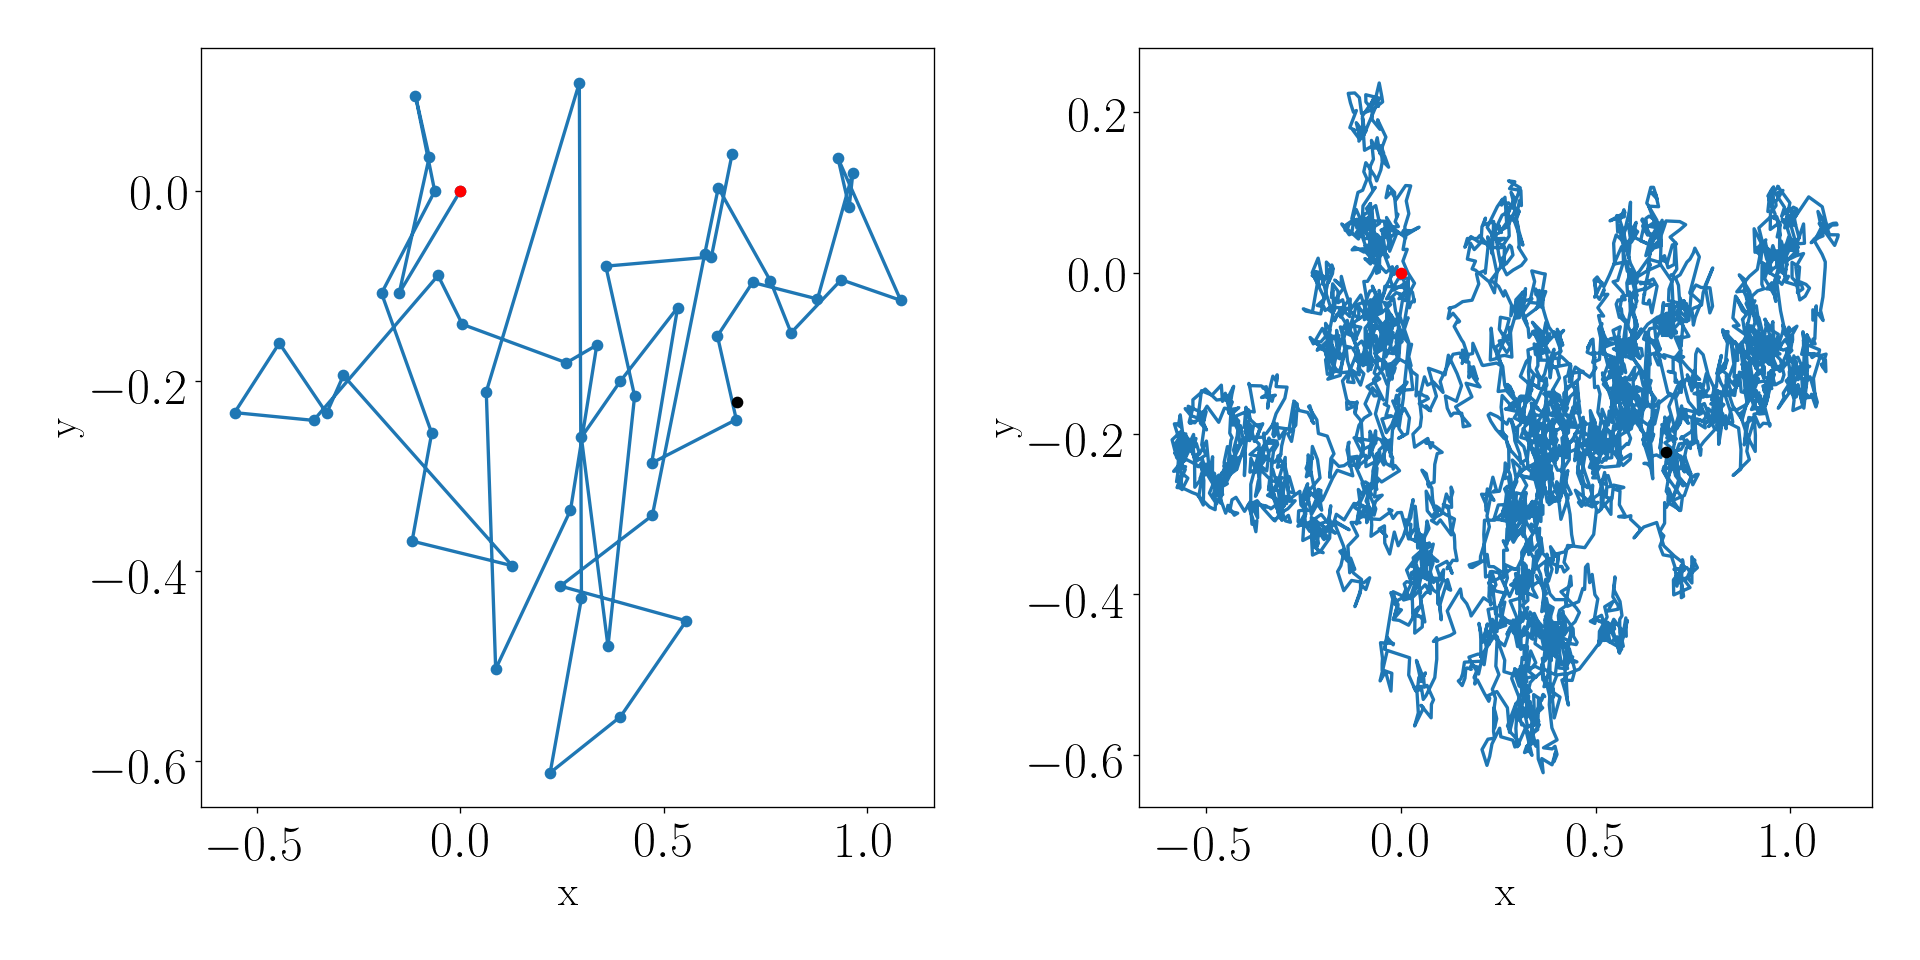

Text(0,0.5,'y')

In [5]:
bm=Gaussian_Choleski(NT=5000,M=2,c=lambda t : lambda s: 0.5*(s+t-np.abs(s-t)))
fig,ax=subplots(1,2,figsize=(2*figheight,figheight),num = "2D BM")

cg=100
a=ax[0]
a.plot(bm.Z[::cg,0],bm.Z[::cg,1],'-o')
a.plot(bm.Z[0,0],bm.Z[0,1],'ro')
a.plot(bm.Z[-1,0],bm.Z[-1,1],'ko')
a.set_xlabel('x')
a.set_ylabel('y')

a=ax[1]
a.plot(bm.Z[:,0],bm.Z[:,1])
a.plot(bm.Z[0,0],bm.Z[0,1],'ro')
a.plot(bm.Z[-1,0],bm.Z[-1,1],'ko')
a.set_xlabel('x')
a.set_ylabel('y')


#### Statistics along each dimension (1D BM)

<IPython.core.display.Javascript object>


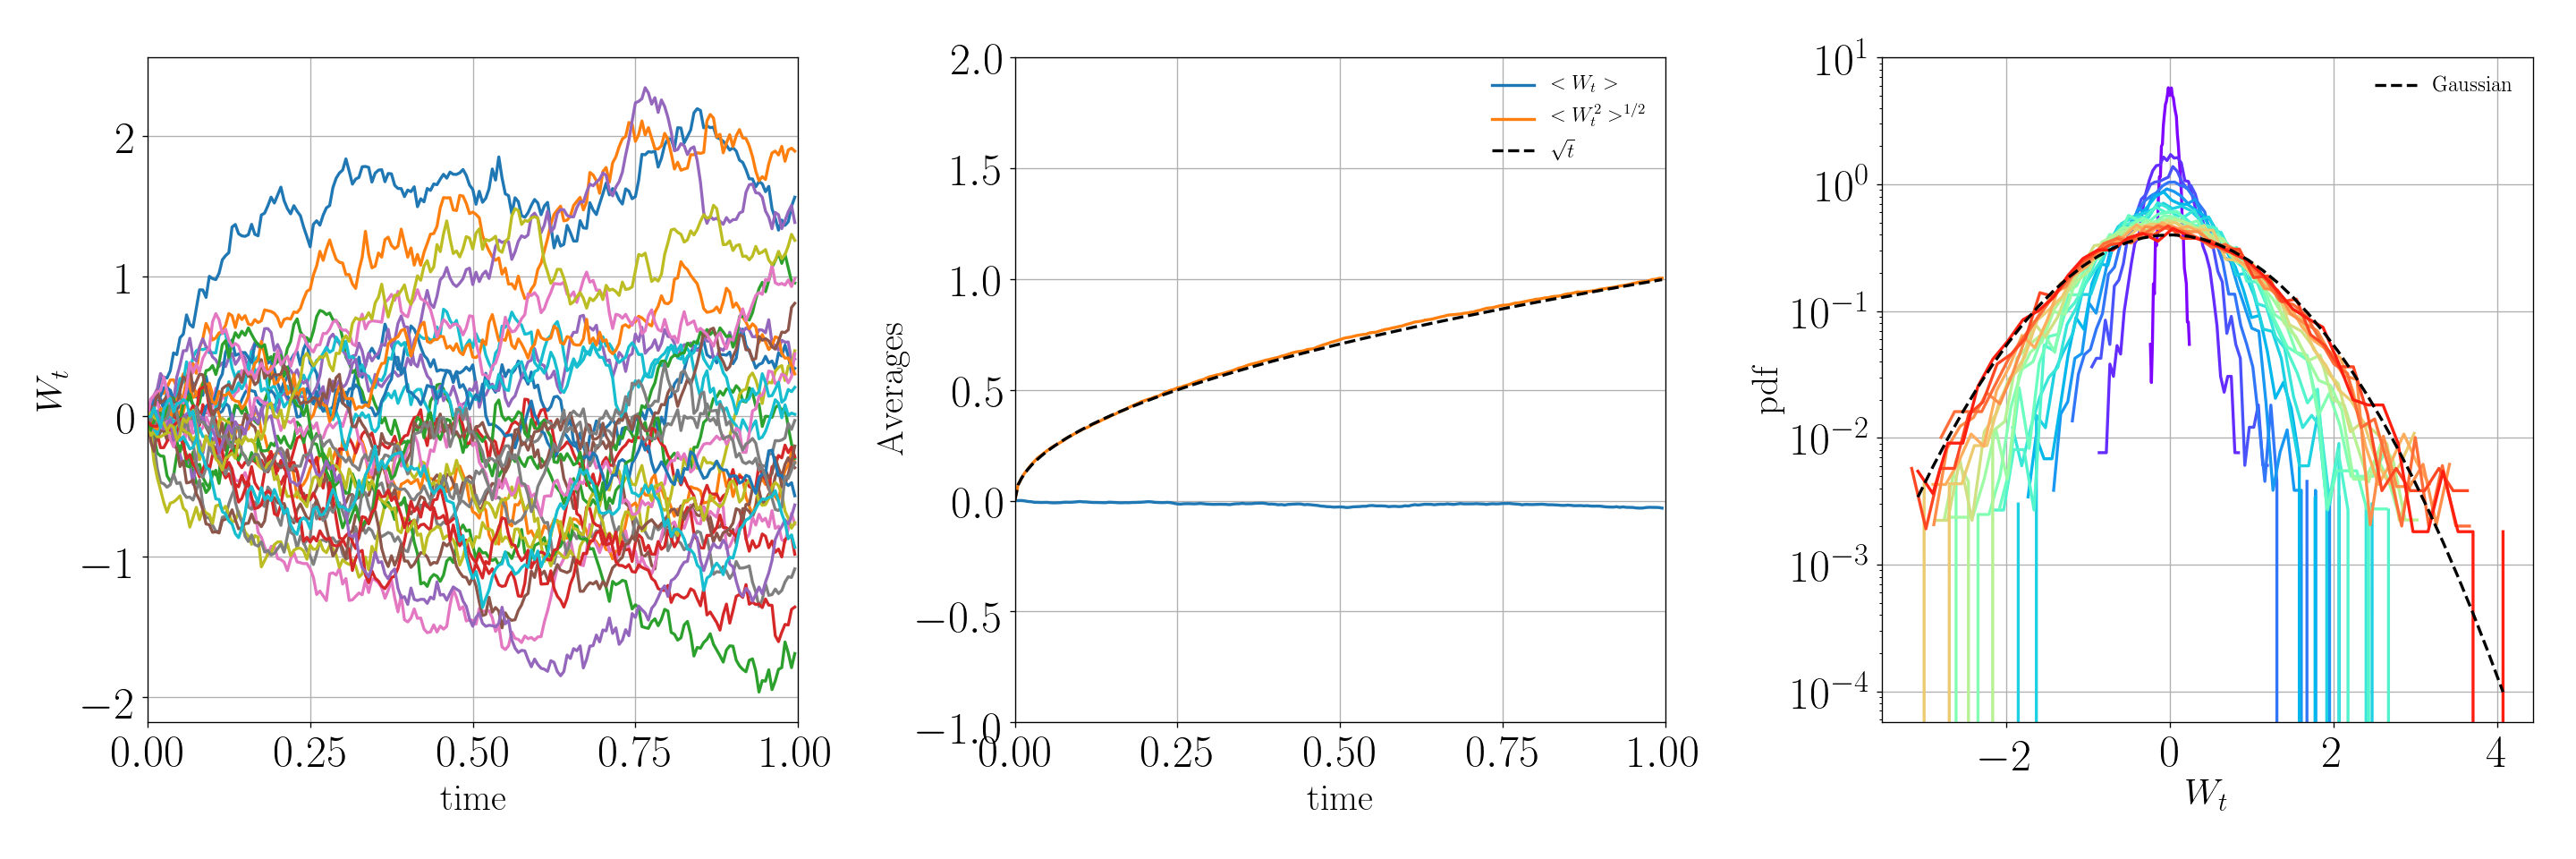

In [6]:
bm=Gaussian_Choleski(NT=200,M=3000,c=lambda t : lambda s: 0.5*(s+t-np.abs(s-t)))
fig,ax=bm.show(norm=False)
ax[1].plot(bm.Time,np.sqrt(bm.Time),'k--',label='$\sqrt{t}$')
ax[1].legend()
ax[2].set_yscale('log')

In [7]:
k=1.38e-23
T=298
rho=1000
nu=1e-6
a=1e-9
gamma=6*pi*nu*rho*a

tau=3600


D=k*T/gamma ; print("D  =", D, "$ \\sqrt{D \\tau}$ = ", np.sqrt(D*tau)/a,"a") 



D  = 2.1816959599037013e-10 $ \sqrt{D \tau}$ =  886233.9113153662 a


In [8]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')